In [15]:
%matplotlib ipympl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

data=  pd.read_csv('/Users/Godfred King/Desktop/Python/Data_science/Course 3/Week 4/train.csv',encoding='ISO-8859-1',low_memory=False)


   


Training data contained some columns which could act as a source of data leakage to the model. e.g The payment amount and payment status and the balaance due which could lead to overfitting of the data and poor performance on the real life dataset

In [16]:
# Remove those who the court did not find as guilty from the data set and pulls out the columns of interest
data= data[['ticket_id','fine_amount',
        'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
        'clean_up_cost', 'judgment_amount','compliance']]\
            .dropna(subset=['compliance']) \
                .set_index('ticket_id')
    
features= data[['fine_amount',
        'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
        'clean_up_cost', 'judgment_amount']]    

compliance= data['compliance']


         


In [17]:
X_train, X_test, y_train, y_test= train_test_split(features, compliance, random_state=0)

Running a Dummy Classifier to compare the results to 


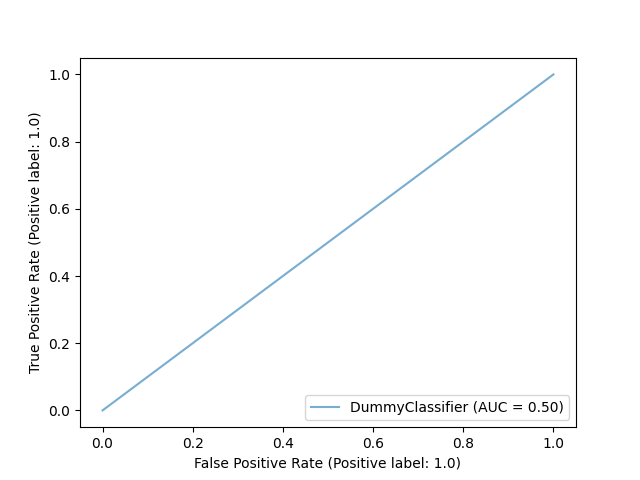

In [19]:
from sklearn.dummy import DummyClassifier

dums= DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dum_predictions= dums.predict(X_test)

RocCurveDisplay.from_estimator(dums,X_test,y_test, ax=plt.gca(), alpha=0.6)


Using gridsearch CV to determine the best parameters for training of the model for the best results

In [ ]:

# 
parameters= {'n_estimators':[50, 100,500,1000,], 'max_depth':[5,10], 'max_features':[2,4]}

forest= RandomForestClassifier()
grid= GridSearchCV(forest, param_grid=parameters)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 5, 'max_features': 2, 'n_estimators': 50}

GridSearchCV best parameters for the RandomforestClassifier={'max_depth': 5, 'max_features': 2, 'n_estimators': 50}



Training and fitting the data with the tuned parameters

In [ ]:
forest= RandomForestClassifier(n_estimators=50, max_features=2, max_depth=5)
forest.fit(X_train, y_train)
probabilities=forest.predict_proba(X_test)


Plotting the ROC Curve

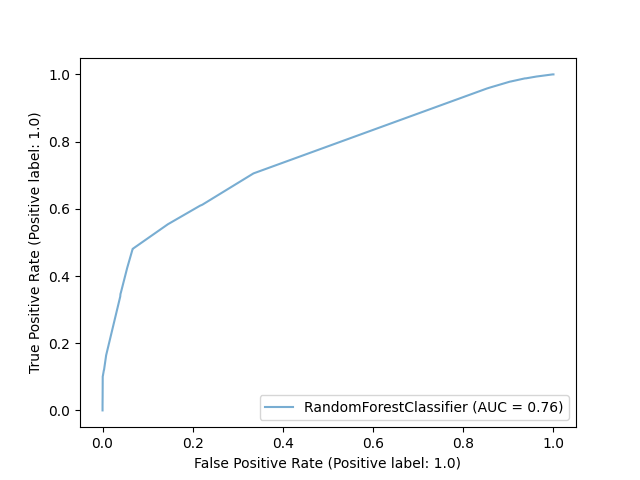

In [ ]:

RocCurveDisplay.from_estimator(forest,X_test,y_test, ax=plt.gca(), alpha=0.6)

AUC score of 0.76 shows that the Random Forest Classifier will be able predict whether or not a violater is going to pay the fine he's due based on the available features. 